# Hospital report

In [1]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image
import pandas as pd
from utils.stroke_team_reporting import StrokeTeamReporting

## Set team

Set team and set up reporting object.

In [2]:
team = 'Lister Hospital'
team_report = StrokeTeamReporting(team)

## Descriptive statistics

### All admissions

In [3]:
team_report.descriptive_summary_all

,All teams 1Q,All teams median,All teams 3Q,Lister Hospital
admissions,349.00,481.00,614.00,666.00
age,73.11,74.84,75.95,75.78
age > 80,0.36,0.41,0.44,0.45
male,0.51,0.53,0.54,0.51
prior_disability,0.87,1.02,1.21,1.27
prior_disability_0-2,0.78,0.81,0.84,0.74
stroke_severity,6.36,7.29,7.88,7.15
onset_known,0.58,0.68,0.75,0.68
onset_to_arrival_time,151.00,175.00,219.00,215.00
onset_within_4hrs,0.35,0.38,0.43,0.36


### Arrivals within 4 hours of known onset

In [4]:
team_report.descriptive_summary_4hrs

,All teams 1Q,All teams median,All teams 3Q,Lister Hospital
admissions,138.000,183.00,239.00,237.00
age,73.300,74.99,75.98,76.26
age > 80,0.370,0.41,0.45,0.48
male,0.510,0.53,0.54,0.51
prior_disability,0.870,1.02,1.20,1.31
prior_disability_0-2,0.770,0.81,0.83,0.73
stroke_severity,8.250,9.11,9.63,8.89
onset_known,1.000,1.00,1.00,1.00
onset_to_arrival_time,98.000,104.00,110.00,111.00
onset_within_4hrs,1.000,1.00,1.00,1.00


## Show overall improvement possible

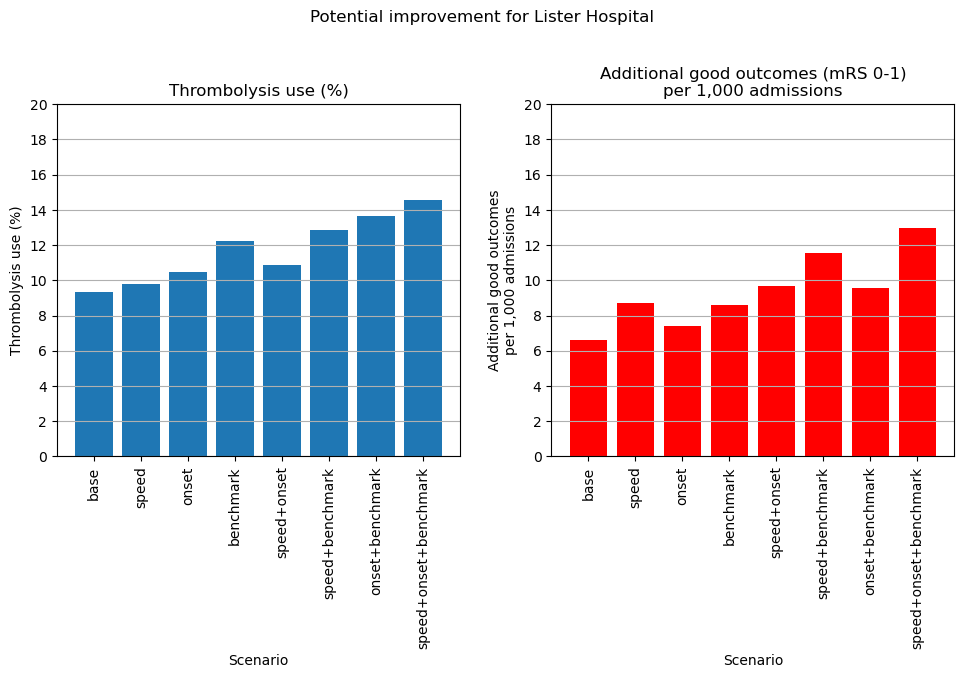

In [5]:
figure = team_report.plot_improvement()

## Show how thrombolysis decisions compare to 25 benchmark hospitals



*Benchmark* hospitals are those 25 hospitals most likely to give most thrombolysis if all hospitals saw the same patients up to (and including) time of scan. These are chosen by looking at the machine leraning model and how the stroke team ID affects the odds of receiving thrombolysis (the stroke team *SHAP* value).

An *ideally thrombolysable patient*:

* Infarction
* 90 mins onset to arrival
* Onset not during sleep
* Precise onset time
* NIHSS 15
* No prior disability
* No use of anticoagulants for atrial fibrillation
* Age 72

*Non-ideal* changes:

* *Late*: Arrival at 3hr 45 min after stroke
* *Mild stroke*: NIHSS 3
* *Prior disability*: mRS 3 before stroke
* *Imprecise*: Imprecisely known stroke onset time
* *Age*: Age 87

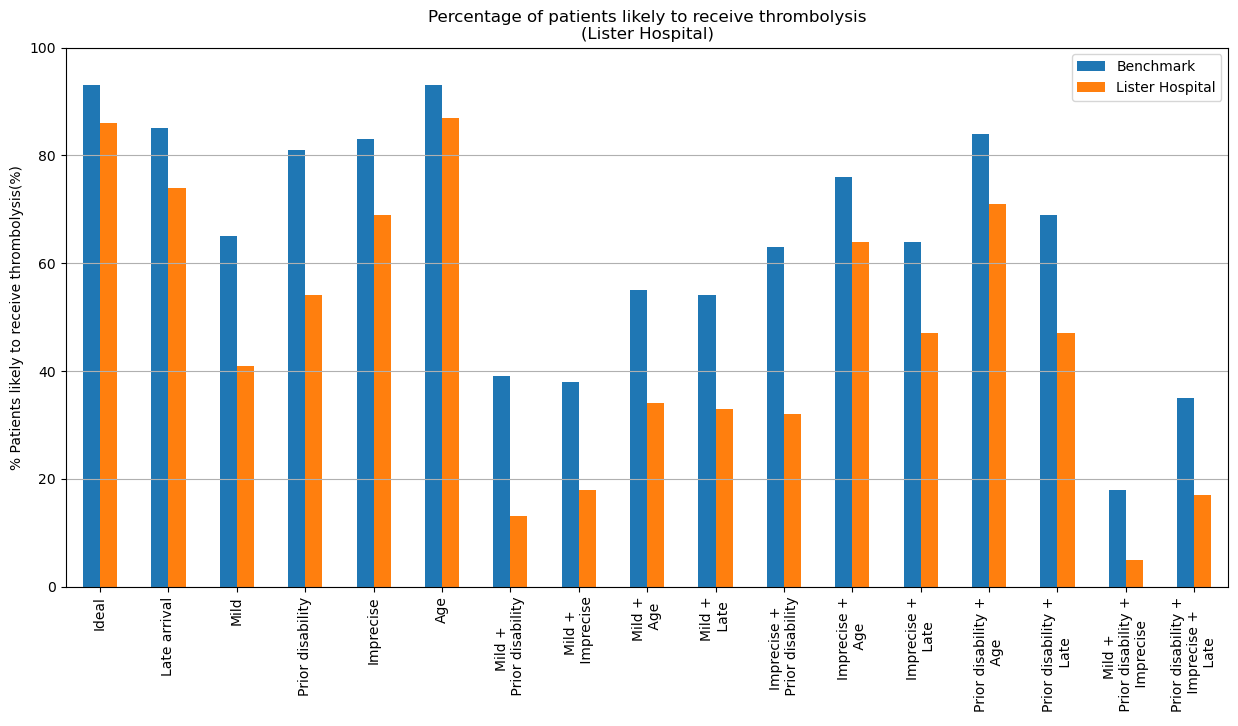

In [6]:
team_report.show_prototype_patients()

To Do

Proportion of arrivals in 30 min bins?